# Dijkstra's algorithm

First, let's implement Dijkstra's algorithm, the simplest and most straightforward pathfinding algorithm.

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [100]:
map = np.zeros((10,15))
map[2:10,4:6] = 1
map[6:8,2:8] = 1
map[0:4,8:10] = 1
map[2:8,10:12] = 1

In [245]:
start, goal = (5,3), (1,10)

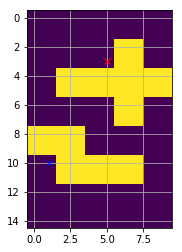

In [246]:
plt.imshow(map.T)
plt.plot(start[0], start[1], 'rx')
plt.plot(goal[0], goal[1], 'bx')
plt.grid()

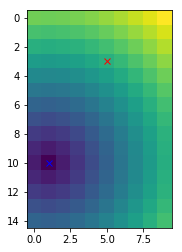

In [247]:
X, Y = np.meshgrid(np.arange(0,map.shape[0]) - goal[0], np.arange(0,map.shape[1]) - goal[1])
heuristic = (X ** 2 + Y ** 2) ** .5
plt.imshow(heuristic)
plt.plot(start[0], start[1], 'rx')
plt.plot(goal[0], goal[1], 'bx')

In [44]:
s = set([start, goal])
print(start, goal, s)
for n in s:
    print(n, start[0] + n[0], start[1] + n[1])

(1, 1) (8, 8) {(8, 8), (1, 1)}
(8, 8) 9 9
(1, 1) 2 2


In [250]:
neighbors = np.array([(-1,0), (0,-1), (1,0), (0,1)])

def dijkstra(map, start, goal):
    #map = map.T
    cost = np.infty * np.ones(map.shape)
    print('cost', cost.shape)
    open_set = set([start])
    cost[start] = 0
    count = 0
    evals = 0
    while 0 < len(open_set):
        next_set = set()
        for node in open_set:
            for n in neighbors:
                next_node = (node[0] + n[0], node[1] + n[1])
                #print('next_node: ', next_node)
                if (0 <= next_node[0] and next_node[0] < cost.shape[0] and
                    0 <= next_node[1] and next_node[1] < cost.shape[1] and
                    map[next_node] == 0 and
                    cost[node] + 1 < cost[next_node]):
                    cost[next_node] = cost[node] + 1
                    next_set.add(next_node)
                    evals += 1
        open_set = next_set
        if 100 < count:
            break
        count += 1
    path = []
    count = 0
    while start != goal:
        next_nodes = np.array([(goal[0] + n[0], goal[1] + n[1]) for n in neighbors])
        prev_node = np.argmin(cost[next_nodes[:,0], next_nodes[:,1]])
        #print('goal: ', goal, next_nodes, ' prev: ', prev_node, next_nodes[prev_node])
        if 100 < count:
            break
        path.append(goal)
        goal = (next_nodes[prev_node][0], next_nodes[prev_node][1])
        count += 1
    path.reverse()
    print('evals: ', evals, ' path length:', len(path))
    return cost, path

In [251]:
cost, path = dijkstra(map, start, goal)
print(path)

cost (10, 15)
evals:  105  path length: 29
[(4, 3), (3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (1, 12), (1, 11), (1, 10)]


Text(4,10,'Goal')

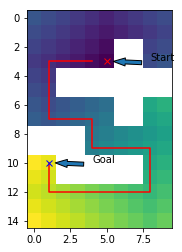

In [267]:
plt.imshow(cost.T)
plt.plot(np.array(path)[:,0], np.array(path)[:,1], 'r')
plt.plot(start[0], start[1], 'rx')
plt.plot(goal[0], goal[1], 'bx')
arrowprops = {'width': 4, 'shrink': .15, 'headwidth': 8}
plt.annotate('Start', start, start + np.array((3,0)), arrowprops = arrowprops)
plt.annotate('Goal', goal, goal + np.array((3,0)), arrowprops = arrowprops)

Wow, that's cool.

C:\Users\masah\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1728: RuntimeWarning: invalid value encountered in subtract
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
C:\Users\masah\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1729: RuntimeWarning: invalid value encountered in subtract
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
C:\Users\masah\Anaconda3\lib\site-packages\numpy\core\numeric.py:1765: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
C:\Users\masah\Anaconda3\lib\site-packages\numpy\core\numeric.py:1770: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
C:\Users\masah\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1784: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])


C:\Users\masah\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


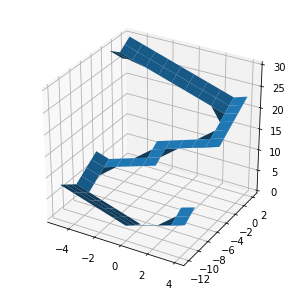

In [242]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, cost.T)